This notebook has ben created with the help from [course.fast.ai](http://course.fast.ai) <br/>
The library that has been used here is [fastai](https://docs.fast.ai/).

# Creating your own dataset from Google Images


To collect the images from Google image, you can refer the tutorial [here](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/) created by [Adrian Rosebrock](https://www.pyimagesearch.com/author/adrian/).

In [0]:
from fastai.vision import *
from fastai.callbacks import *
classes = ['Football Match', 'Celebration', 'Card', 'Spectators', 'Penalty', 'Starting Anthem', 'Bicycle Kick', 'Corner Kick']

In [3]:
len(classes)

8

## Mount Drive

In [4]:
import numpy as np
np.random.seed(42)
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
from google.colab import files
#uploaded = files.upload()
import io
path=Path("/content/drive/My Drive/cbir/")
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='finalhopeful.csv', ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (2306 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
StartingAnthem,StartingAnthem,StartingAnthem,StartingAnthem,StartingAnthem
Path: /content/drive/My Drive/cbir;

Valid: LabelList (576 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Penalty,Spectators,Card,CornerKick,FootballMatch
Path: /content/drive/My Drive/cbir;

Test: None

# **Load the Model from Drive**

I have already trained and saved the model in my Drive so I'm just going to fetch it from there

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])
learn.load('unfreeze-stage-1')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 86.9MB/s]


Learner(data=ImageDataBunch;

Train: LabelList (2306 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
StartingAnthem,StartingAnthem,StartingAnthem,StartingAnthem,StartingAnthem
Path: /content/drive/My Drive/cbir;

Valid: LabelList (576 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Penalty,Spectators,Card,CornerKick,FootballMatch
Path: /content/drive/My Drive/cbir;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=

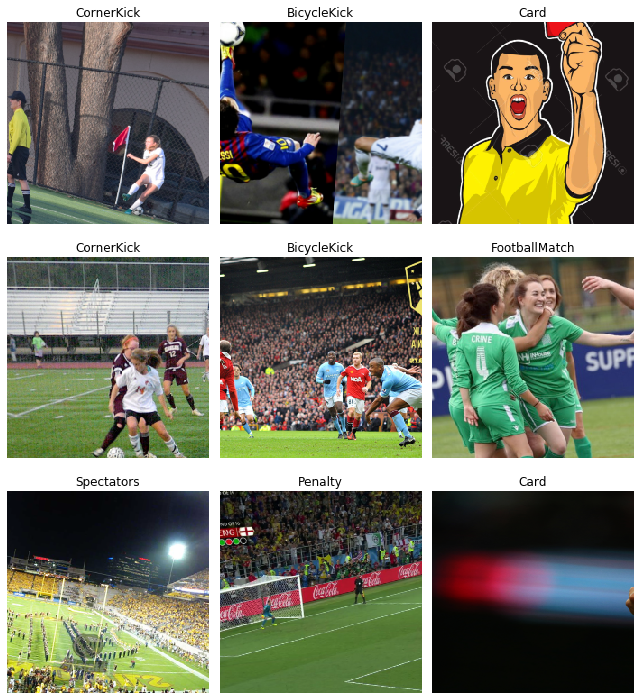

In [7]:
data.show_batch(rows=3, figsize=(9,10))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['BicycleKick',
  'Card',
  'Celebration',
  'CornerKick',
  'FootballMatch',
  'Penalty',
  'Spectators',
  'StartingAnthem'],
 8,
 2306,
 576)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 73.6MB/s]


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


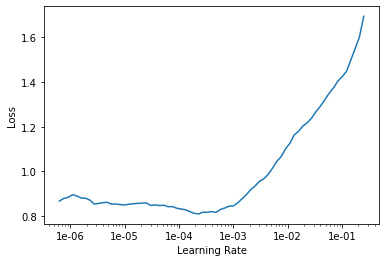

In [0]:
learn.recorder.plot()

In [0]:
lr = 1e-03

In [0]:
learn.callback_fns.append(partial(SaveModelCallback, name='stage-1'))

In [0]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.840861,1.096632,0.371528,0.628472,02:21
1,0.817221,1.096188,0.366319,0.633681,02:22
2,0.795616,1.170308,0.383681,0.616319,02:24
3,0.741483,1.129429,0.362847,0.637153,02:22
4,0.678163,1.181529,0.368056,0.631944,02:23
5,0.584092,1.135676,0.357639,0.642361,02:23
6,0.489563,1.196148,0.373264,0.626736,02:24
7,0.407065,1.167368,0.350694,0.649306,02:23
8,0.350218,1.161468,0.347222,0.652778,02:21
9,0.307534,1.159872,0.342014,0.657986,02:24


Better model found at epoch 0 with valid_loss value: 1.0966315269470215.
Better model found at epoch 0 with valid_loss value: 1.0966315269470215.
Better model found at epoch 1 with valid_loss value: 1.0961878299713135.
Better model found at epoch 1 with valid_loss value: 1.0961878299713135.


In [0]:
learn.load('stage-1');

In [0]:
learn.unfreeze()

In [0]:
learn.callback_fns.pop()

functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, name='stage-1')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [9]:
learn.recorder.plot()

AttributeError: ignored

In [0]:
learn.callback_fns.append(partial(SaveModelCallback, name='unfreeze-stage-1'))

In [0]:
learn.save('unfreeze-stage-1')

## Model Summary

In [0]:
learn.load('unfreeze-stage-1');

In [0]:
learn.unfreeze()

In [10]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

## Data Augmentation

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

## Interpretation

In [0]:
learn.load('unfreeze-stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

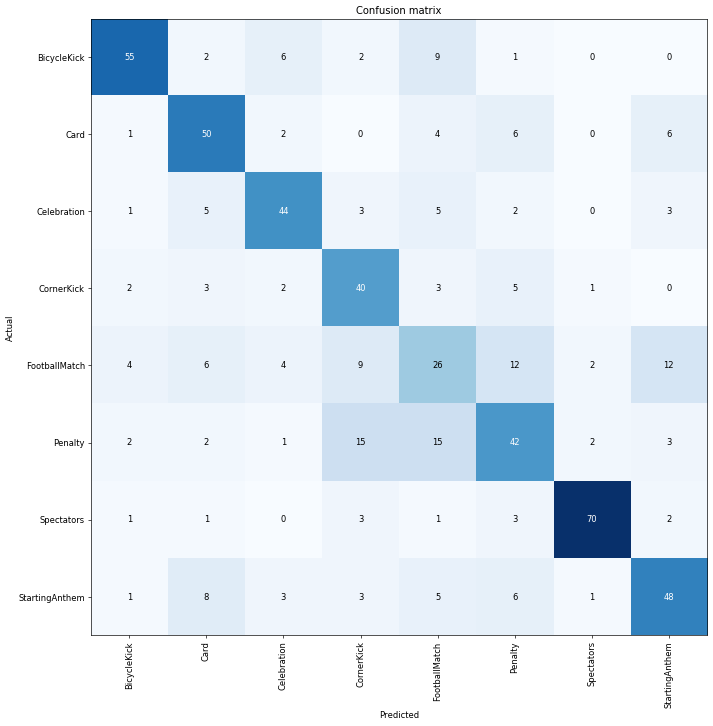

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [15]:
interp.most_confused(min_val=5)

[('Penalty', 'CornerKick', 15),
 ('Penalty', 'FootballMatch', 15),
 ('FootballMatch', 'Penalty', 12),
 ('FootballMatch', 'StartingAnthem', 12),
 ('BicycleKick', 'FootballMatch', 9),
 ('FootballMatch', 'CornerKick', 9),
 ('StartingAnthem', 'Card', 8),
 ('BicycleKick', 'Celebration', 6),
 ('Card', 'Penalty', 6),
 ('Card', 'StartingAnthem', 6),
 ('FootballMatch', 'Card', 6),
 ('StartingAnthem', 'Penalty', 6),
 ('Celebration', 'Card', 5),
 ('Celebration', 'FootballMatch', 5),
 ('CornerKick', 'Penalty', 5),
 ('StartingAnthem', 'FootballMatch', 5)]

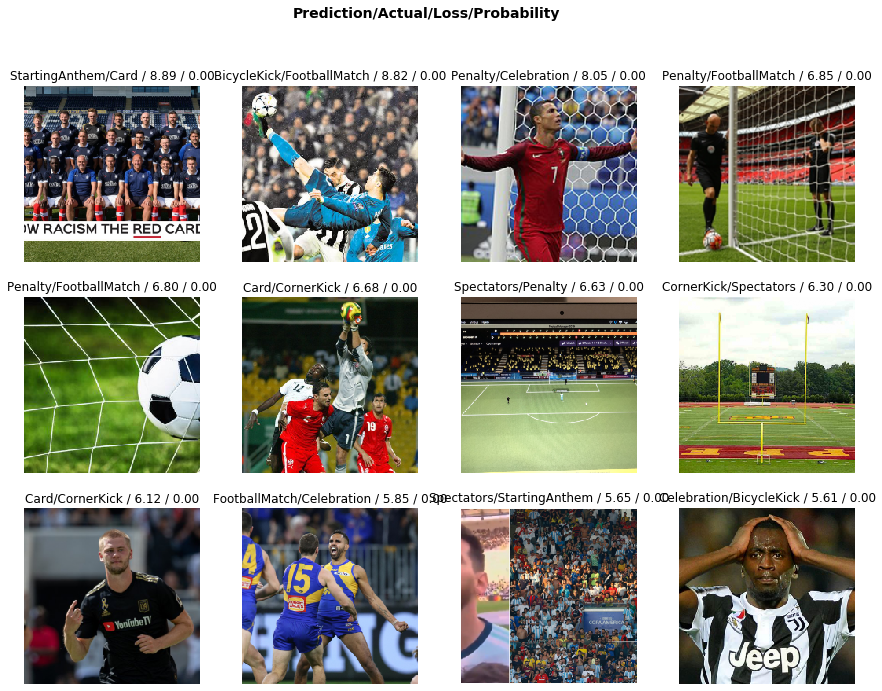

In [16]:
interp.plot_top_losses(12, figsize=(15,11))

## Result

Category CornerKick

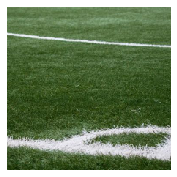

In [9]:
x,y = data.valid_ds[169]
x.show()
y=list(learn.predict(x))
y[0]

In [0]:
from google.colab.patches import cv2_imshow
from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
import cv2
vidcap = cv2.VideoCapture('/content/drive/My Drive/cbir/videoplayback (1).mp4')
width = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)) # uses given video width and height
height = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out_filename = '/content/drive/My Drive/Colab Notebooks/full match final.mp4'
fps = vidcap.get(cv2.CAP_PROP_FPS)
vfor=cv2.VideoWriter_fourcc('M','J','P','G')
vwriter = cv2.VideoWriter(out_filename, cv2.VideoWriter_fourcc(*'MJPG'), fps, (int(vidcap.get(3)),int(vidcap.get(4))))
success,image = vidcap.read()
l={'FootballMatch': 0, 'Celebration': 0, 'Card': 0, 'Spectators': 0, 'Penalty': 0, 'StartingAnthem': 0, 'BicycleKick': 0, 'CornerKick': 0}
count=0
outp=' '
while success:
    img=Image(pil2tensor(image, dtype=np.float32).div_(255))
    res=list(learn.predict(img))
    l[str(res[0])]+=1
    count=count+1
    if(count>60):
      high=0
      outp=' '
      for j in l:
        if(l[j]>high):
          high=l[j]
          outp=j
      l={'FootballMatch': 0, 'Celebration': 0, 'Card': 0, 'Spectators': 0, 'Penalty': 0, 'StartingAnthem': 0, 'BicycleKick': 0, 'CornerKick': 0}
      count=0
    if(outp=='StartingAnthem'):
      outp='Player'
    elif(outp=='BicycleKick' or outp=='Penalty'):
      outp='Chances Of Goal'
    elif(outp=='CornerKick'):
      outp='Ball Pass'
    image_np=cv2.putText(image, outp, (150, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)
    vwriter.write(image_np)
    success,image = vidcap.read()
vidcap.release()
cv2.destroyAllWindows()
vwriter.release()


# Playing Video

In [0]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/My Drive/Colab Notebooks/soccermini.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url)